In [1]:
from deepface import DeepFace
import deepface
from deepface.detectors import FaceDetector, OpenCvWrapper, SsdWrapper, DlibWrapper, MtcnnWrapper, RetinaFaceWrapper,

MediapipeWrapper
import cv2
import time
from matplotlib import pyplot as plt
import numpy as np
import time

In [2]:
def print_image(img, title='result', covert_colors=True):
    copy_img = img.copy()
    if covert_colors:
        copy_img = cv2.cvtColor(copy_img, cv2.COLOR_BGRA2RGBA)
    plt.imshow(copy_img[:, :])
    plt.title(title)
    plt.show()


def draw_face_rectangle(img, rectangle):
    x = rectangle[0]
    y = rectangle[1]
    w = rectangle[2]
    h = rectangle[3]
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return img


def print_facec_with_rects(img, rects):
    cimg = img.copy()
    for rect in rects:
        draw_face_rectangle(cimg, rect)
    print_image(cimg)

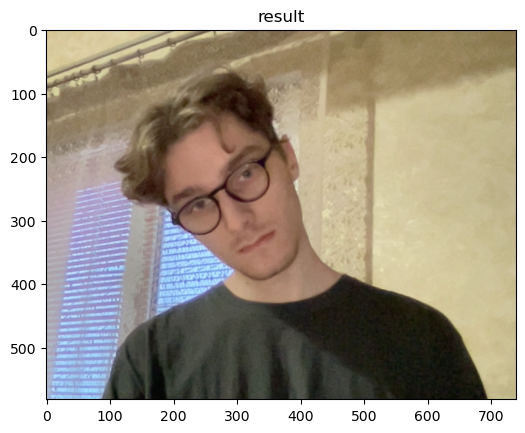

In [4]:
img = cv2.imread('../imgs/demo/img.png')

print_image(img)

In [11]:
model = FaceDetector.build_model('retinaface')
face, region = FaceDetector.detect_face(model, 'retinaface', img, align=False)
print_image(face)
print(region)

[181, 136, 216, 250]


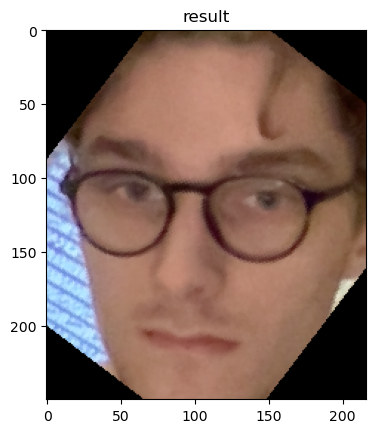

In [8]:
model = FaceDetector.build_model('retinaface')
face, region = FaceDetector.detect_face(model, 'retinaface', img, align=True)
print_image(face)

In [10]:
img_representation = DeepFace.represent(img, detector_backend='retinaface')
img_representation

[0.003207300789654255,
 -0.0004539491783361882,
 -0.014821388758718967,
 0.013836376368999481,
 0.013670952059328556,
 0.01859680563211441,
 0.007267318200320005,
 0.014531603083014488,
 0.005039575509727001,
 0.02047009766101837,
 0.019398236647248268,
 0.006676658056676388,
 -0.003708136733621359,
 0.0019768718630075455,
 0.005584740545600653,
 0.003278080839663744,
 0.029259050264954567,
 0.012307470664381981,
 0.007426640018820763,
 0.01608561910688877,
 0.0191790871322155,
 0.01438380591571331,
 0.006997945252805948,
 0.01076442003250122,
 0.013379470445215702,
 -0.007448552642017603,
 0.01159560028463602,
 0.0037940521724522114,
 0.0032011994626373053,
 0.01470139715820551,
 -0.002782390918582678,
 -0.008684760890901089,
 -0.007946247234940529,
 0.011446447111666203,
 0.0010716913966462016,
 -0.0020244051702320576,
 -0.0069186752662062645,
 -0.010769926011562347,
 0.002465177560225129,
 -0.0013792011886835098,
 -0.00015938220894895494,
 0.0022346971090883017,
 -0.0070753525942564

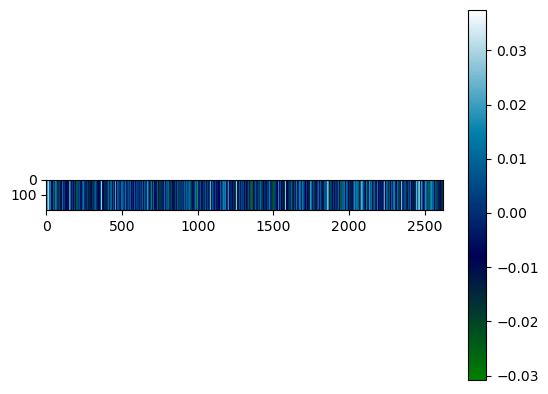

In [15]:
img_graph = []

for i in range(0, 200):
    img_graph.append(img_representation)

img_graph = np.array(img_graph)

fig = plt.figure()

im = plt.imshow(img_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()

plt.show()

[0.003207300789654255, -0.0004539491783361882, -0.014821388758718967, 0.013836376368999481, 0.013670952059328556, 0.01859680563211441, 0.007267318200320005, 0.014531603083014488, 0.005039575509727001, 0.02047009766101837, 0.019398236647248268, 0.006676658056676388, -0.003708136733621359, 0.0019768718630075455, 0.005584740545600653, 0.003278080839663744, 0.029259050264954567, 0.012307470664381981, 0.007426640018820763, 0.01608561910688877, 0.0191790871322155, 0.01438380591571331, 0.006997945252805948, 0.01076442003250122, 0.013379470445215702, -0.007448552642017603, 0.01159560028463602, 0.0037940521724522114, 0.0032011994626373053, 0.01470139715820551, -0.002782390918582678, -0.008684760890901089, -0.007946247234940529, 0.011446447111666203, 0.0010716913966462016, -0.0020244051702320576, -0.0069186752662062645, -0.010769926011562347, 0.002465177560225129, -0.0013792011886835098, -0.00015938220894895494, 0.0022346971090883017, -0.007075352594256401, -0.002109444234520197, -0.009217822924

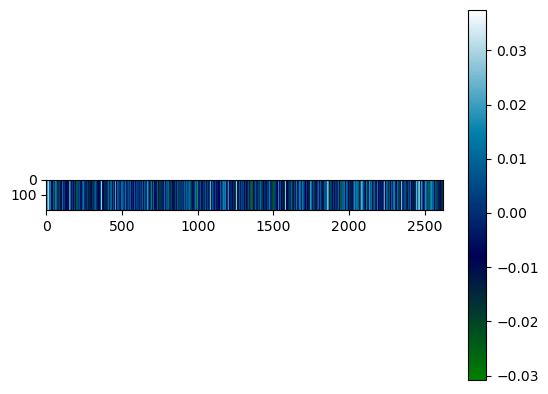

In [16]:
img2 = cv2.imread('../imgs/recognition-test-1.jpeg')
img_representation2 = DeepFace.represent(img, detector_backend='retinaface')

print(img_representation2)

img_graph2 = []

for i in range(0, 200):
    img_graph2.append(img_representation2)

img_graph2 = np.array(img_graph2)

fig = plt.figure()

im = plt.imshow(img_graph2, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()

plt.show()

In [32]:
import cv2
from deepface.detectors import FaceDetector


def prepareDetectingModel(model):
    builders = {
        'opencv': FaceDetector.build_model,
        'ssd': FaceDetector.build_model,
        'dlib': FaceDetector.build_model,
        'mtcnn': FaceDetector.build_model,
        'retinaface': FaceDetector.build_model,
        'mediapipe': FaceDetector.build_model
    }

    builder = builders.get(model)

    return builder(model)


def detect(img, model, detectorModel):
    detectors = {
        'opencv': detectFaceOpenCv,
        'ssd': detectFaceSsd,
        'dlib': detectFaceDlib,
        'mtcnn': detectFaceMtcnn,
        'retinaface': detectFaceRetinaFace,
        'mediapipe': detectFaceMediapipe
    }
    detector = detectors.get(model)
    return detector(img, detectorModel)


def detectFaceOpenCv(img, detectorModel):
    resp = []

    faces = detectorModel["face_detector"].detectMultiScale(img, 1.1, 10)

    if len(faces) > 0:

        for x, y, w, h in faces:
            img_region = [x, y, w, h]
            resp.append(img_region)

    return resp


def detectFaceMtcnn(img, detectorModel):
    resp = []
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # mtcnn expects RGB but OpenCV read BGR

    detections = detectorModel.detect_faces(img_rgb)

    if len(detections) > 0:

        for detection in detections:
            x, y, w, h = detection["box"]
            img_region = [x, y, w, h]
            resp.append(img_region)

    return resp


def detectFaceRetinaFace(img, detectorModel):
    from retinaface import RetinaFace

    resp = []

    obj = RetinaFace.detect_faces(img, model=detectorModel, threshold=0.9)

    if type(obj) == dict:
        for key in obj:
            identity = obj[key]
            facial_area = identity["facial_area"]

            y = facial_area[1]
            h = facial_area[3] - y
            x = facial_area[0]
            w = facial_area[2] - x
            img_region = [x, y, w, h]

            resp.append(img_region)

    return resp


def detectFaceSsd(img, detectorModel):
    import pandas as pd

    resp = []

    ssd_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]

    target_size = (300, 300)

    base_img = img.copy()  # we will restore base_img to img later

    original_size = img.shape

    img = cv2.resize(img, target_size)

    aspect_ratio_x = (original_size[1] / target_size[1])
    aspect_ratio_y = (original_size[0] / target_size[0])

    imageBlob = cv2.dnn.blobFromImage(image=img)

    face_detector = detectorModel["face_detector"]
    face_detector.setInput(imageBlob)
    detections = face_detector.forward()

    detections_df = pd.DataFrame(detections[0][0], columns=ssd_labels)

    detections_df = detections_df[detections_df['is_face'] == 1]  # 0: background, 1: face
    detections_df = detections_df[detections_df['confidence'] >= 0.90]

    detections_df['left'] = (detections_df['left'] * 300).astype(int)
    detections_df['bottom'] = (detections_df['bottom'] * 300).astype(int)
    detections_df['right'] = (detections_df['right'] * 300).astype(int)
    detections_df['top'] = (detections_df['top'] * 300).astype(int)

    if detections_df.shape[0] > 0:

        for index, instance in detections_df.iterrows():
            left = instance["left"]
            right = instance["right"]
            bottom = instance["bottom"]
            top = instance["top"]
            img_region = [int(left * aspect_ratio_x), int(top * aspect_ratio_y),
                          int(right * aspect_ratio_x) - int(left * aspect_ratio_x),
                          int(bottom * aspect_ratio_y) - int(top * aspect_ratio_y)]

            resp.append(img_region)

    return resp


def detectFaceDlib(img, detectorModel):
    resp = []
    face_detector = detectorModel["face_detector"]
    detections = face_detector(img, 1)

    if len(detections) > 0:

        for idx, d in enumerate(detections):
            left = d.left();
            right = d.right()
            top = d.top();
            bottom = d.bottom()

            img_region = [left, top, right - left, bottom - top]

            resp.append(img_region)

    return resp


def detectFaceMediapipe(img, detectorModel):
    resp = []

    img_width = img.shape[1]
    img_height = img.shape[0]

    results = detectorModel.process(img)

    if results.detections:
        for detection in results.detections:

            confidence = detection.score
            bounding_box = detection.location_data.relative_bounding_box
            landmarks = detection.location_data.relative_keypoints

            x = int(bounding_box.xmin * img_width)
            w = int(bounding_box.width * img_width)
            y = int(bounding_box.ymin * img_height)
            h = int(bounding_box.height * img_height)

            if x > 0 and y > 0:
                img_region = [x, y, w, h]

                resp.append(img_region)

    return resp


opencv
Execution time: 92.71502494812012 ms


Execution time: 46.629905700683594 ms


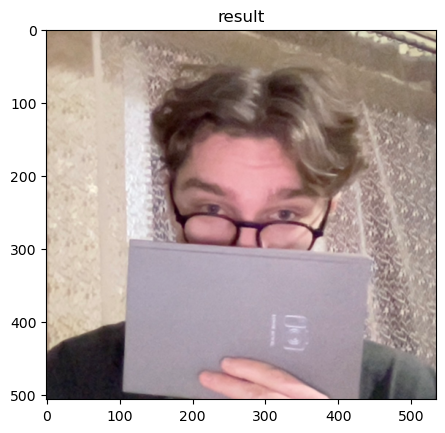

Execution time: 50.18782615661621 ms


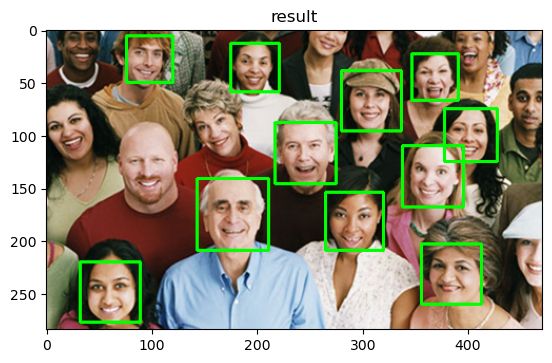

mtcnn
Execution time: 789.0198230743408 ms


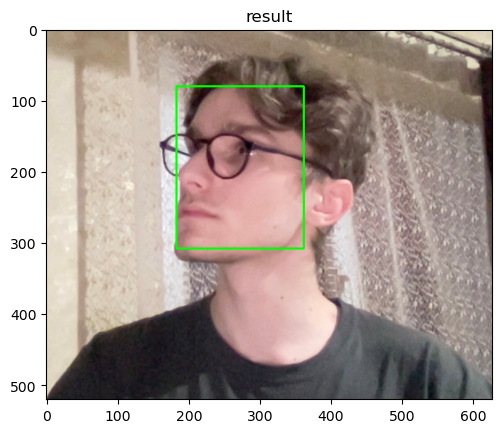

Execution time: 328.4616470336914 ms


Execution time: 445.2710151672363 ms


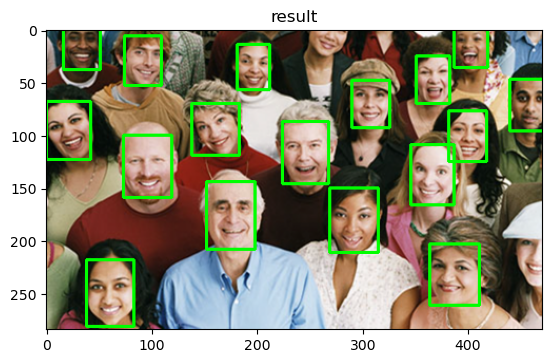

retinaface
Execution time: 3875.826358795166 ms


Execution time: 3108.567714691162 ms


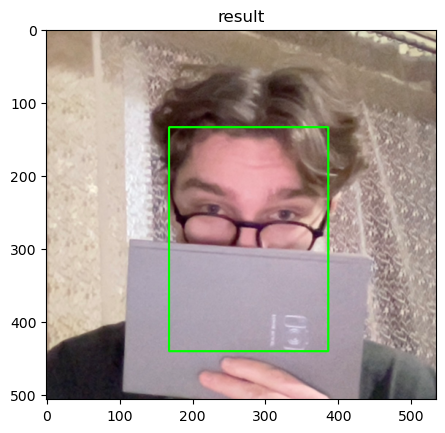

Execution time: 4711.997032165527 ms


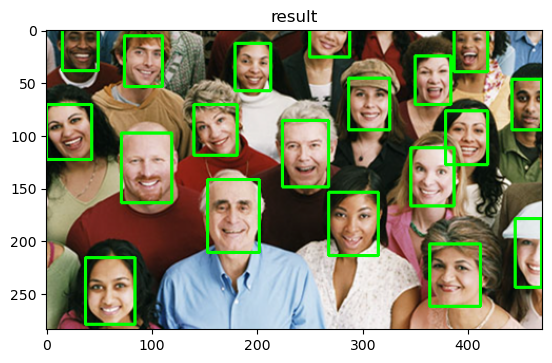

mediapipe
Execution time: 5.423069000244141 ms


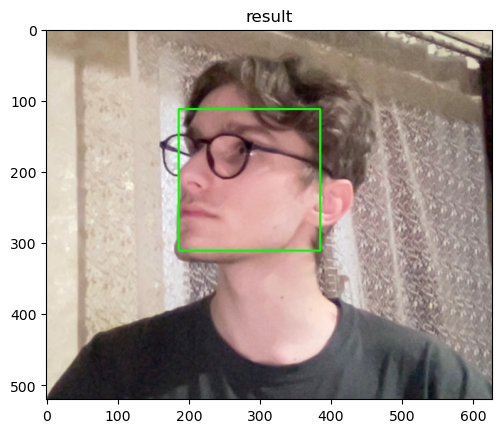

Execution time: 3.2639503479003906 ms


Execution time: 2.8848648071289062 ms


In [35]:
# opencv
# ssd
# dlib
# mtcnn
# retinaface
# mediapipe

detectors = [
    'opencv',
    'mtcnn',
    'retinaface',
    'mediapipe',
]
imgs = [
    '../imgs/demo/img_1.png',
    '../imgs/demo/img_2.png',
    '../imgs/demo/img_3.png',
]

for detector in detectors:
    print(detector)

    for img_path in imgs:
        img = cv2.imread(img_path)
        model = prepareDetectingModel(detector)
        startTime = time.time()
        result = detect(img, detector, model)
        resultTimeMs = (time.time() - startTime) * 1000
        print(f'Execution time: {resultTimeMs} ms')
        print_facec_with_rects(img, result)

In [42]:
from deepface.detectors.OpenCvWrapper import build_cascade

img = cv2.imread('../imgs/demo/img_4.png')
model = build_cascade('haarcascade_eye')


def align_face():
    detected_face_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #eye detector expects gray scale image

    #eyes = eye_detector.detectMultiScale(detected_face_gray, 1.3, 5)
    eyes = model.detectMultiScale(detected_face_gray, 1.1, 10)

    #----------------------------------------------------------------

    #opencv eye detectin module is not strong. it might find more than 2 eyes!
    #besides, it returns eyes with different order in each call (issue 435)
    #this is an important issue because opencv is the default detector and ssd also uses this
    #find the largest 2 eye. Thanks to @thelostpeace

    eyes = sorted(eyes, key=lambda v: abs((v[0] - v[2]) * (v[1] - v[3])), reverse=True)

    #----------------------------------------------------------------

    if len(eyes) >= 2:
        #decide left and right eye

        eye_1 = eyes[0];
        eye_2 = eyes[1]

    left_eye, right_eye = 0, 0

    if eye_1[0] < eye_2[0]:
        left_eye = eye_1
        right_eye = eye_2
    else:
        left_eye = eye_2
        right_eye = eye_1

    return left_eye, right_eye


#-----------------------
#find center of eyes
# 	left_eye = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
# 	right_eye = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
# 	img = FaceDetector.alignment_procedure(img, left_eye, right_eye)
# return img  #return img anyway

left_eye, right_eye = align_face()

In [43]:
print_facec_with_rects(img, [left_eye, right_eye])

In [47]:
true_img = '../imgs/verify-samples/img_4.png'
imgs = [
    '../imgs/verify-samples/img.png',
    '../imgs/verify-samples/img_1.png',
    '../imgs/verify-samples/img_2.png',
    '../imgs/verify-samples/img_3.png',
]
# VGG-Face, Facenet, OpenFace, DeepFace, DeepID, Dlib, ArcFace or Ensemble
models = [
    'VGG-Face',
    'Facenet',
    'OpenFace',
    'DeepFace',
    'ArcFace'
]

for model in models:
    print(f'Model: {model}')
    print('-----------------------------------------')

    for img_path in imgs:
        print(f'Comparing with {img_path}')

        startTime = time.time()

        result = DeepFace.verify(true_img, img_path, model, detector_backend='mtcnn')

        resultTimeMs = (time.time() - startTime) * 1000

        print(f'Execution time: {resultTimeMs} ms')
        print('Result')
        print(result)
        print('-----------------------------------------')

Model: VGG-Face
-----------------------------------------
Comparing with ../imgs/verify-samples/img.png
Execution time: 2279.531955718994 ms
Result
{'verified': True, 'distance': 0.24405993231008583, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mtcnn', 'similarity_metric': 'cosine'}
-----------------------------------------
Comparing with ../imgs/verify-samples/img_1.png
Execution time: 1402.4689197540283 ms
Result
{'verified': True, 'distance': 0.3091075717408829, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mtcnn', 'similarity_metric': 'cosine'}
-----------------------------------------
Comparing with ../imgs/verify-samples/img_2.png
Execution time: 1307.279109954834 ms
Result
{'verified': True, 'distance': 0.364535990717597, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'mtcnn', 'similarity_metric': 'cosine'}
-----------------------------------------
Comparing with ../imgs/verify-samples/img_3.png
Execution time: 1310.3008270263672 ms
Resul

In [4]:
import cv2
import mediapipe as mp

In [24]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Handedness: [classification {
  index: 0
  score: 0.9843984842300415
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.21966615319252014
  y: 0.7105715274810791
  z: 6.178681246638007e-07
}
landmark {
  x: 0.2902928292751312
  y: 0.6511169672012329
  z: -0.02411539852619171
}
landmark {
  x: 0.328583687543869
  y: 0.5515400171279907
  z: -0.029951542615890503
}
landmark {
  x: 0.3444512188434601
  y: 0.469002366065979
  z: -0.034733716398477554
}
landmark {
  x: 0.3613770008087158
  y: 0.4042256474494934
  z: -0.03986303135752678
}
landmark {
  x: 0.2574206292629242
  y: 0.4287094473838806
  z: -0.01260813232511282
}
landmark {
  x: 0.28808948397636414
  y: 0.32436710596084595
  z: -0.03439240902662277
}
landmark {
  x: 0.3110213875770569
  y: 0.25822913646698
  z: -0.053980953991413116
}
landmark {
  x: 0.33053988218307495
  y: 0.20004796981811523
  z: -0.06731750071048737
}
landmark {
  x: 0.21086665987968445
  y: 0.4131222069263458
  z: -0.016808340325951576
}
landmark {
  x: 0.

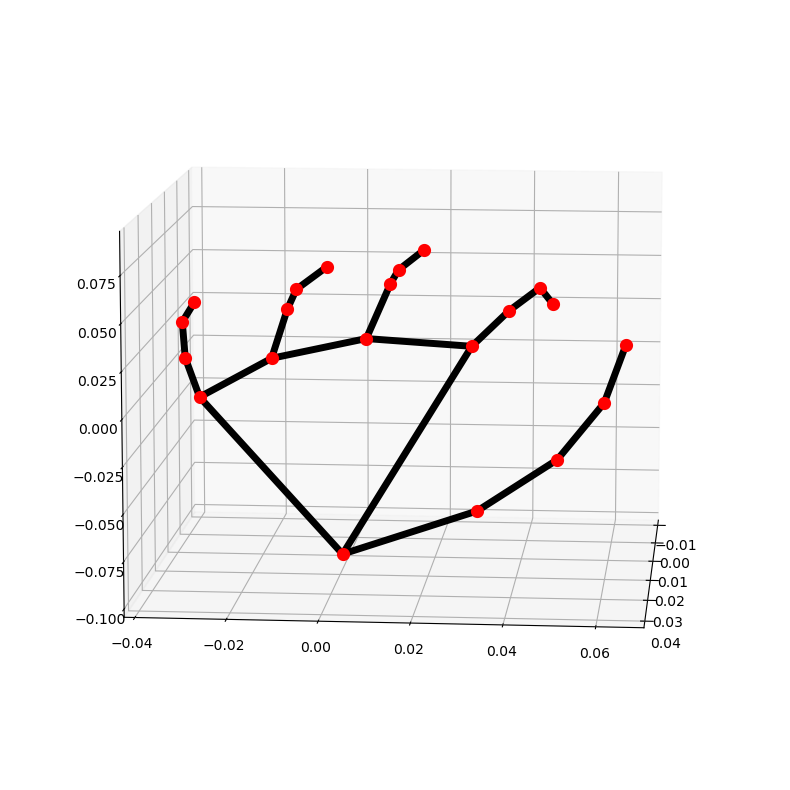

In [6]:
# For static images:
IMAGE_FILES = [
    '../imgs/demo/img_5.png',
]
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(IMAGE_FILES):
        # Read an image, flip it around y-axis for correct handedness output (see
        # above).
        image = cv2.flip(cv2.imread(file), 1)
        # Convert the BGR image to RGB before processing.
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Print handedness and draw hand landmarks on the image.
        print('Handedness:', results.multi_handedness)
        if not results.multi_hand_landmarks:
            continue
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()
        for hand_landmarks in results.multi_hand_landmarks:
            print('hand_landmarks:', hand_landmarks)
            print(
                f'Index finger tip coordinates: (',
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
            )
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
        cv2.imwrite(
            '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
        # Draw hand world landmarks.
        if not results.multi_hand_world_landmarks:
            continue
        for hand_world_landmarks in results.multi_hand_world_landmarks:
            mp_drawing.plot_landmarks(
                hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [7]:
img = cv2.imread('../imgs/hands/img_1.png')

with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

    result = cv2.flip(image, 1)
    print_image(result)

In [28]:
# '../imgs/demo/hand-gesture.mp4'
# '../imgs/demo/hand-gesture-result.avi'
def readVideoAndProcess(inputPath, outputPath, processDelegate, frameRate=10):
    input = cv2.VideoCapture(inputPath)
    try:
        ret, frame = input.read()

        if not ret:
            raise Exception('Can\'t read')

        frame_height, frame_width, _ = frame.shape
        output = cv2.VideoWriter(outputPath, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), frameRate,
                                 (frame_width, frame_height))

        try:

            resultFrame = processDelegate(frame)
            output.write(resultFrame)

            while True:
                ret, frame = input.read()

                if not ret:
                    break

                resultFrame = processDelegate(frame)
                output.write(resultFrame)
        except Exception as e:
            print('Exception during process ((((')
            print(e)
        finally:
            output.release()
    except Exception as e:
        print('Exception during process ((((')
        print(e)
    finally:
        input.release()


def handGesture(frame):
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        frame.flags.writeable = False
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())

        result = cv2.flip(image, 1)
        # print_image(result)
        return result


In [22]:
# '../imgs/demo/hand-gesture.mp4'
# '../imgs/demo/hand-gesture-result.avi'
readVideoAndProcess('../imgs/demo/handGesture3.mp4', '../imgs/demo/handGesture3Result.avi', handGesture)

[ WARN:0@1744.562] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@1744.563] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'



(<unknown>:18935): GStreamer-CRITICAL **: 17:09:23.195: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@1744.761] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/open

In [27]:
def faceMesh(frame):
    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            max_num_faces=1,
            refine_landmarks=True,
            min_detection_confidence=0.5) as face_mesh:
        # Convert the BGR image to RGB before processing.
        image = frame
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        annotated_image = image.copy()

        for face_landmarks in results.multi_face_landmarks:
            # print('face_landmarks:', face_landmarks)
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_IRISES,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_iris_connections_style())

        return annotated_image
        # print_image(annotated_image)


In [29]:
# '../imgs/demo/hand-gesture.mp4'
# '../imgs/demo/hand-gesture-result.avi'
readVideoAndProcess('../imgs/demo/face-mesh.mp4', '../imgs/demo/face-mesh-result.avi', faceMesh)

[ WARN:0@2148.820] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@2148.820] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'



(<unknown>:18935): GStreamer-CRITICAL **: 17:16:07.298: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@2148.850] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/open